In [1]:
import pandas as pd

# Dictionary with team stats: (wins, draws, losses)
team_stats = {
    "Liverpool": (25, 9, 4),
    "Arsenal": (20, 14, 4),
    "Manchester City": (21, 7, 10),
    "Chelsea": (20, 9, 9),
    "Newcastle United": (20, 6, 12),
    "Aston Villa": (19, 9, 10),
    "Nottingham Forest": (19, 8, 11),
    "Brighton": (16, 13, 9),
    "Bournemouth": (15, 11, 12),
    "Brentford": (16, 8, 14),
    "Fulham": (15, 9, 14),
    "Crystal Palace": (13, 13, 12),
    "Everton": (11, 15, 12),
    "West Ham United": (11, 10, 17),
    "Manchester United": (11, 9, 18),
    "Wolves": (12, 6, 20),
    "Tottenham Hotspur": (11, 5, 22),
    "Leicester City": (6, 7, 25),
    "Ipswich Town": (4, 10, 24),
    "Southampton": (2, 6, 30),
}

# Convert to DataFrame
df = pd.DataFrame([
    {"Team": team, "Wins": w, "Draws": d, "Losses": l}
    for team, (w, d, l) in team_stats.items()
])

# Add a Games Played column
df["Games Played"] = df["Wins"] + df["Draws"] + df["Losses"]

# Optional: Add probability columns
df["Win Probability"] = (df["Wins"] / df["Games Played"]).round(3)
df["Draw Probability"] = (df["Draws"] / df["Games Played"]).round(3)
df["Loss Probability"] = (df["Losses"] / df["Games Played"]).round(3)

print(df.head())  # View first few rows

               Team  Wins  Draws  Losses  Games Played  Win Probability  \
0         Liverpool    25      9       4            38            0.658   
1           Arsenal    20     14       4            38            0.526   
2   Manchester City    21      7      10            38            0.553   
3           Chelsea    20      9       9            38            0.526   
4  Newcastle United    20      6      12            38            0.526   

   Draw Probability  Loss Probability  
0             0.237             0.105  
1             0.368             0.105  
2             0.184             0.263  
3             0.237             0.237  
4             0.158             0.316  


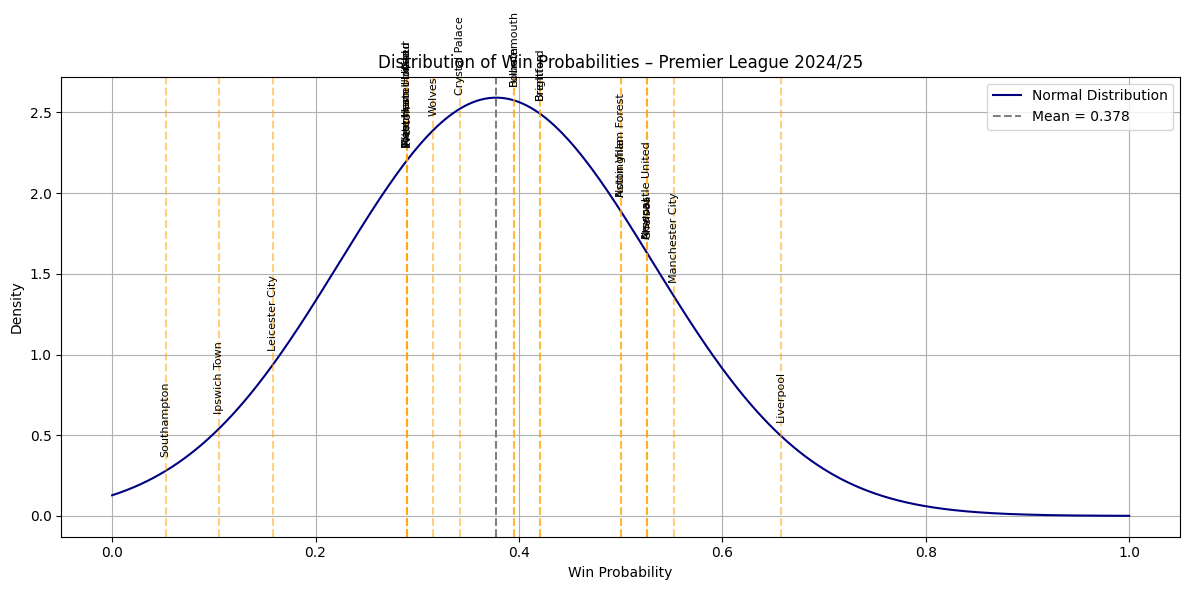

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Premier League win probabilities (as computed earlier)
team_stats = {
    "Liverpool": (25, 9, 4),
    "Arsenal": (20, 14, 4),
    "Manchester City": (21, 7, 10),
    "Chelsea": (20, 9, 9),
    "Newcastle United": (20, 6, 12),
    "Aston Villa": (19, 9, 10),
    "Nottingham Forest": (19, 8, 11),
    "Brighton": (16, 13, 9),
    "Bournemouth": (15, 11, 12),
    "Brentford": (16, 8, 14),
    "Fulham": (15, 9, 14),
    "Crystal Palace": (13, 13, 12),
    "Everton": (11, 15, 12),
    "West Ham United": (11, 10, 17),
    "Manchester United": (11, 9, 18),
    "Wolves": (12, 6, 20),
    "Tottenham Hotspur": (11, 5, 22),
    "Leicester City": (6, 7, 25),
    "Ipswich Town": (4, 10, 24),
    "Southampton": (2, 6, 30),
}

# Convert to win probabilities
win_probs = [w / (w + d + l) for w, d, l in team_stats.values()]
teams = list(team_stats.keys())

# Calculate mean and standard deviation
mean = np.mean(win_probs)
std_dev = np.std(win_probs)

# Create normal distribution curve
x = np.linspace(0, 1, 500)
y = norm.pdf(x, mean, std_dev)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='navy', label='Normal Distribution')
plt.axvline(mean, color='gray', linestyle='--', label=f'Mean = {mean:.3f}')

# Overlay win probabilities
for team, prob in zip(teams, win_probs):
    plt.axvline(prob, color='orange', linestyle='--', alpha=0.5)
    plt.text(prob, norm.pdf(prob, mean, std_dev) + 0.1, team, rotation=90, fontsize=8, ha='center')

plt.title("Distribution of Win Probabilities – Premier League 2024/25")
plt.xlabel("Win Probability")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
